In [4]:
%run Dataloader.ipynb

otto-group-product-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns


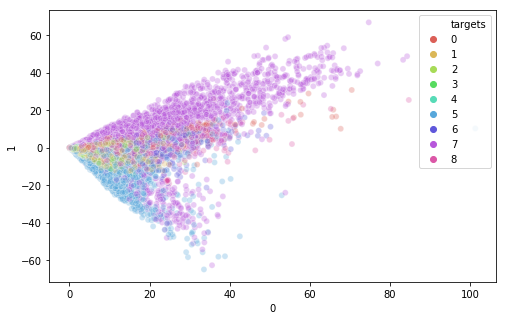

In [6]:
#2D Truncated SVD
svd = TruncatedSVD(2)
X_items = svd.fit_transform(train_x)

df = pd.DataFrame(X_items)
df['targets'] = train_y.values

plt.figure(figsize=(8,5))
sns.scatterplot(
    x=0, y=1,
    hue="targets",
    data=df,
    legend="full",
    palette=sns.color_palette("hls", 9),
    alpha=0.3)

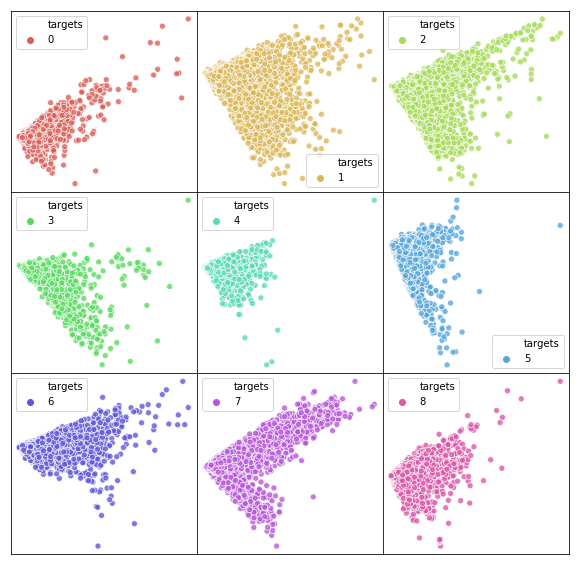

In [7]:
fig, axes = plt.subplots(3,3, figsize = (10,10))
fig.subplots_adjust(hspace=0,wspace=0)

for i, ax in enumerate(axes.flat):
    
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    data = df[df['targets'] == i]
    sns.scatterplot(x=0, y=1,
                         data=data,
                         hue = 'targets',
                         legend="full",alpha=0.8, color = 'k',
                          palette = [sns.color_palette("hls", 9)[i]],
                           ax = ax)

In [8]:
#Pickle train df
df.to_pickle('./truncSVD_train.pkl')

#Pickle val df
X_val_items = svd.transform(val_x)
df = pd.DataFrame(X_val_items)
df['targets'] = val_y.values
df.to_pickle('./truncSVD_val.pkl')